In [138]:
#openmpi commands
'''
export LD_LIBRARY_PATH=$HOME/.conda/envs/dist/lib:$LD_LIBRARY_PATH
export PATH=$HOME/.conda/envs/dist/bin:$PATH
'''

import numpy as np
import matplotlib.pyplot as plt
import json
import pickle
import random
import matplotlib.colors as colors
import os

###
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme()

plt.style.use('seaborn-paper')
#sns.set_context("paper")
###

#99% sparsification
sp_0p99_2048 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621320878_l2-0.0001_lr-0.1_epochs-300_batchsize-128_basebatchsize-64_num_mpi_process_8_n_sub_process-1_topology-ring_optim-parallel_choco_v-stepsize-0.00625_comm_info-compress_random_k-0.99_warmup_epochs-0_unit-2048/0'
sp_0p98_1024 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621330047_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.98__unit-1024/0'
sp_0p96_512 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621334515_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.96__unit-512/0'
sp_0p92_256 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621338248_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.92__unit-256/0'
sp_0p84_128 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621340709_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.84__unit-128/0'


#95% sparsification
sp_0p95_2048 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621371383_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.95__dataset-cifar10_unit-2048/0'
sp_0p90_1024 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621382215_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.9__dataset-cifar10_unit-1024/0'
sp_0p80_512 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621388862_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.8__dataset-cifar10_unit-512/0'
sp_0p60_256 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621393365_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.6__dataset-cifar10_unit-256/0'
sp_0p20_128 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621564632_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.2__dataset-cifar10_unit-128/0'

# Equal Output Data Plot vs Iterations

/home/aarao8/.conda/envs/dist/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/aarao8/.conda/envs/dist/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/aarao8/.conda/envs/dist/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/aarao8/.conda/envs/dist/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/aarao8/.conda/envs/dist/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/aarao8/.conda/envs/dist/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/a

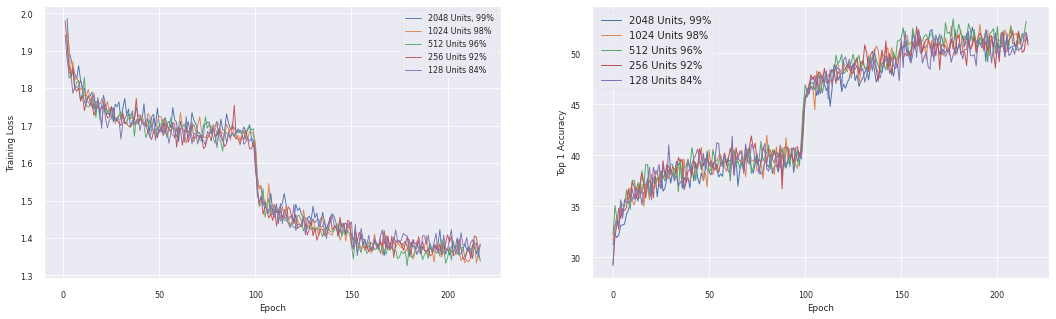

In [139]:
fig, ax = plt.subplots(1, 2,figsize=(18,5))
best_acc = []
min_loss = []
best_epochs = []
best_loss = 10000
best_epoch = 0
count = 0
for k in [
        sp_0p99_2048,
          sp_0p98_1024,
          sp_0p96_512,
          sp_0p92_256,
          sp_0p84_128,
    
#           sp_0p95_2048,
#           sp_0p90_1024,
#           sp_0p80_512,
#           sp_0p60_256
          ]:
    loss_list = []
    acc_list = []
    epoch_acc_list = []
    epoch_loss_list = []
    epoch_num = 1
    for j in os.listdir(k):
        if not j.endswith('.json'):
            continue
        with open(k + '/' + j ,'r') as f:
            a = json.load(f)
        for i in range(len(a)):
            if('loss' in a[i].keys()):
                if a[i]['epoch'] <= epoch_num:
                    if('top1' in a[i].keys() and a[i]['split'] == 'train'):
                        if(a[i]['loss'] <= 2.0):
                            acc_list.append(a[i]['top1'])
                            loss_list.append(a[i]['loss'])
                            if(a[i]['loss'] < best_loss and not np.isnan(a[i]['loss'])):
                                #print(a[i]['epoch'])
                                best_epoch = a[i]['epoch']
                else:
                    epoch_loss_list.append(np.mean(loss_list))
                    epoch_acc_list.append(np.mean(acc_list))
                    loss_list = []
                    acc_list = []
                    epoch_num += 1            
            else:
                continue;
    labels = ['2048 Units, 99%','1024 Units 98%','512 Units 96%','256 Units 92%','128 Units 84%',
              '2048 Units, 95%','1024 Units 90%','512 Units 80%','256 Units 60%']
    #plt.yscale('log')
    
    
    
    
    markers = ['s']
    
    ax[0].plot(np.arange(len(epoch_loss_list[:218])),epoch_loss_list[:218],label = labels[count],linewidth=0.9)
    ax[0].set_ylabel("Training Loss")
    ax[0].set_xlabel("Epoch")
    ax[0].legend()
    
    #plt.subplot(2,2,2)
    best_epochs.append(best_epoch)
    epoch_acc_list = epoch_acc_list[:218]
    epoch_loss_list = epoch_loss_list[:218]
    epoch_acc_list = [x for x in epoch_acc_list if not np.isnan(x)]
    epoch_loss_list = [x for x in epoch_loss_list if not np.isnan(x)]
    best_acc.append(np.max(epoch_acc_list))
    min_loss.append(np.min(epoch_loss_list))
    #print(epoch_loss_list)
    ax[1].plot(epoch_acc_list[:218],label = labels[count],linewidth=1)
    plt.ylabel('Top 1 Accuracy')
    plt.xlabel('Epoch')
    #plt.yscale('log')
    #plt.title('1 Hidden-Layer MLP with 512 Hidden Units')
    plt.legend(prop={'size': 10})
    
    count+=1
plt.savefig('fig3.pdf')


In [141]:
print(best_epochs)
print(best_acc)
print(min_loss)
print("Training Accuracy For all widths allowing same data: {}+-{}".format(np.mean(best_acc),np.std(best_acc)))
print("Training Loss For all widths allowing same data: {}+-{}".format(np.mean(min_loss),np.std(min_loss)))

[218.0, 221.0, 300.0, 300.0, 300.0]
[52.57542061201617, 52.84269352202847, 53.40525772542037, 52.62349008494143, 52.34775786357119]
[1.3452176228061414, 1.332949251326332, 1.3254507422825228, 1.3417431648384694, 1.348483974934801]
Training Accuracy For all widths allowing same data: 52.75892396159552+-0.3593989560174256
Training Loss For all widths allowing same data: 1.3387689512376533+-0.008438679918186264


# Unequal Data (const sparsification ratio) Plot vs iteration
## For k=99,97,95,80,50

In [142]:
#plotting for a constant sparsificatioon ratio

sp_0p99_2048 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/unequal_data_0p99to0p95/1621403576_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.99__dataset-cifar10_unit-2048/0'
sp_0p99_1024 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/unequal_data_0p99to0p95/1621411822_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.99__dataset-cifar10_unit-1024/0'
sp_0p99_512 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/unequal_data_0p99to0p95/1621417759_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.99__dataset-cifar10_unit-512/0'
sp_0p99_256 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/unequal_data_0p99to0p95/1621421513_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.99__dataset-cifar10_unit-256/0'

sp_0p97_2048 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/unequal_data_0p99to0p95/1621423963_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.97__dataset-cifar10_unit-2048/0'
sp_0p97_1024 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/unequal_data_0p99to0p95/1621432612_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.97__dataset-cifar10_unit-1024/0'
sp_0p97_512 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/unequal_data_0p99to0p95/1621438641_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.97__dataset-cifar10_unit-512/0'
sp_0p97_256 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/unequal_data_0p99to0p95/1621442376_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.97__dataset-cifar10_unit-256/0'

/home/aarao8/.conda/envs/dist/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/aarao8/.conda/envs/dist/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/aarao8/.conda/envs/dist/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/aarao8/.conda/envs/dist/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/aarao8/.conda/envs/dist/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/aarao8/.conda/envs/dist/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/home/a

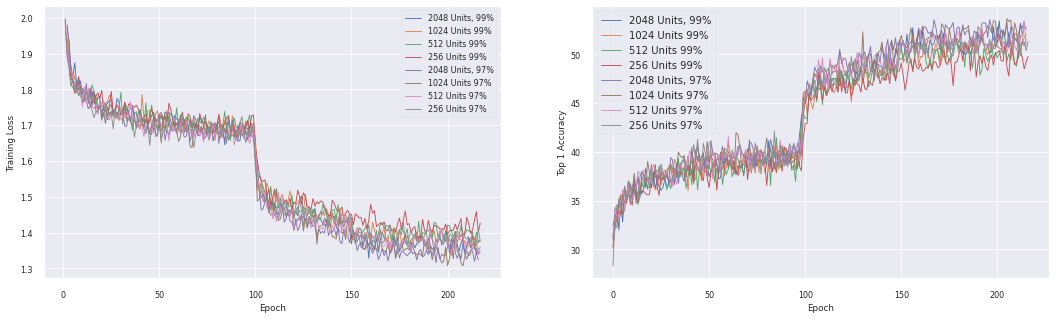

In [143]:

fig, ax = plt.subplots(1, 2,figsize=(18,5))
best_acc = []
min_loss = []
best_epochs = []
best_loss = 10000
best_epoch = 0
count = 0
for k in [
    sp_0p99_2048,
    sp_0p99_1024,
    sp_0p99_512,
    sp_0p99_256,
    sp_0p97_2048,
    sp_0p97_1024,
    sp_0p97_512,
    sp_0p97_256
          ]:
    loss_list = []
    acc_list = []
    epoch_acc_list = []
    epoch_loss_list = []
    epoch_num = 1
    for j in os.listdir(k):
        if not j.endswith('.json'):
            continue
        with open(k + '/' + j ,'r') as f:
            a = json.load(f)
        for i in range(len(a)):
            if('loss' in a[i].keys()):
                if a[i]['epoch'] <= epoch_num:
                    if('top1' in a[i].keys() and a[i]['split'] == 'train'):
                        if(a[i]['loss'] <= 2.0):
                            acc_list.append(a[i]['top1'])
                            loss_list.append(a[i]['loss'])
                            if(a[i]['loss'] < best_loss and not np.isnan(a[i]['loss'])):
                                #print(a[i]['epoch'])
                                best_epoch = a[i]['epoch']
                else:
                    epoch_loss_list.append(np.mean(loss_list))
                    epoch_acc_list.append(np.mean(acc_list))
                    loss_list = []
                    acc_list = []
                    epoch_num += 1            
            else:
                continue;
    labels = ['2048 Units, 99%','1024 Units 99%','512 Units 99%','256 Units 99%',
              '2048 Units, 97%','1024 Units 97%','512 Units 97%','256 Units 97%']
    #plt.yscale('log')
    
    
    
    
    markers = ['s']
    
    ax[0].plot(np.arange(len(epoch_loss_list[:218])),epoch_loss_list[:218],label = labels[count],linewidth=0.9)
    ax[0].set_ylabel("Training Loss")
    ax[0].set_xlabel("Epoch")
    ax[0].legend()
    
    #plt.subplot(2,2,2)
    best_epochs.append(best_epoch)
    epoch_acc_list = epoch_acc_list[:218]
    epoch_loss_list = epoch_loss_list[:218]
    epoch_acc_list = [x for x in epoch_acc_list if not np.isnan(x)]
    epoch_loss_list = [x for x in epoch_loss_list if not np.isnan(x)]
    best_acc.append(np.max(epoch_acc_list))
    min_loss.append(np.min(epoch_loss_list))
    #print(epoch_loss_list)
    ax[1].plot(epoch_acc_list[:217],label = labels[count],linewidth=0.9)
    plt.ylabel('Top 1 Accuracy')
    plt.xlabel('Epoch')
    #plt.yscale('log')
    #plt.title('1 Hidden-Layer MLP with 512 Hidden Units')
    plt.legend(prop={'size': 10})
    
    count+=1
plt.savefig('fig4.pdf')


# Plotting loss values vs cumulative data consumption

In [144]:
def gather_loss(losses,label,threshold = None):
    loss_dict = {}
    acc_dict = {}
    data_dict = {}

    count = 0
    for k in losses:
        cumulative_data=0
        loss_list = []
        acc_list = []
        data_list = []
        epoch_acc_list = []
        epoch_loss_list = []
        epoch_data_list = []
        epoch_num = 1
        for j in os.listdir(k):
            if not j.endswith('.json'):
                continue
            with open(k + '/' + j ,'r') as f:
                a = json.load(f)
            for i in range(len(a)):
                if('loss' in a[i].keys()):
                    if a[i]['epoch'] <= epoch_num:
                        if('n_bits_to_transmit' in a[i].keys() and a[i]['split'] == 'train'):
                            if(threshold is not None):
                                if(a[i]['loss'] <= threshold):
                                    acc_list.append(a[i]['top1'])
                                    loss_list.append(a[i]['loss'])
                                    cumulative_data+= a[i]['n_bits_to_transmit']
                                    data_list.append(cumulative_data)
                            else:
                                acc_list.append(a[i]['top1'])
                                loss_list.append(a[i]['loss'])
                                cumulative_data+= a[i]['n_bits_to_transmit']
                                data_list.append(cumulative_data)                                  
                    else:
                        epoch_loss_list.append(np.mean(loss_list))
                        epoch_acc_list.append(np.mean(acc_list))
                        epoch_data_list.append(np.mean(data_list))
                        loss_list = []
                        acc_list = []
                        data_list = []
                        epoch_num += 1            
                else:
                    continue;
        loss_dict[label[count]] = epoch_loss_list
        acc_dict[label[count]] = epoch_acc_list
        data_dict[label[count]] = epoch_data_list
        count+=1
    return loss_dict,acc_dict,data_dict

In [145]:
'''
Random-K
'''
#99% sparsification
sp_0p99_2048 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621320878_l2-0.0001_lr-0.1_epochs-300_batchsize-128_basebatchsize-64_num_mpi_process_8_n_sub_process-1_topology-ring_optim-parallel_choco_v-stepsize-0.00625_comm_info-compress_random_k-0.99_warmup_epochs-0_unit-2048/0'
sp_0p98_1024 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621330047_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.98__unit-1024/0'
sp_0p96_512 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621334515_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.96__unit-512/0'
sp_0p92_256 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621338248_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.92__unit-256/0'
sp_0p84_128 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621340709_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.84__unit-128/0'


#95% sparsification
sp_0p95_2048 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621371383_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.95__dataset-cifar10_unit-2048/0'
sp_0p90_1024 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621382215_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.9__dataset-cifar10_unit-1024/0'
sp_0p80_512 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621388862_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.8__dataset-cifar10_unit-512/0'
sp_0p60_256 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621393365_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.6__dataset-cifar10_unit-256/0'
sp_0p20_128 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621564632_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.2__dataset-cifar10_unit-128/0'

#90% sparsification
sp_0p90_2048 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621567221_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.9__dataset-cifar10_unit-2048/0'
sp_0p80_1024 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621577705_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.8__dataset-cifar10_unit-1024/0'
sp_0p60_512 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621585960_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.6__dataset-cifar10_unit-512/0'
sp_0p20_256 = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621590420_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_random_k-0.2__dataset-cifar10_unit-256/0'

'''
Top-K 
'''
#99% sparsification
sp_0p99_2048_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621665989_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.99__dataset-cifar10_unit-2048/0'
sp_0p98_1024_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621672959_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.98__dataset-cifar10_unit-1024/0'
sp_0p96_512_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621678553_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.96__dataset-cifar10_unit-512/0'
sp_0p92_256_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621682047_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.92__dataset-cifar10_unit-256/0'
sp_0p84_128_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621684227_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.84__dataset-cifar10_unit-128/0'


#95% sparsification
sp_0p95_2048_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621685931_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.95__dataset-cifar10_unit-2048/0'
sp_0p90_1024_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621693377_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9__dataset-cifar10_unit-1024/0'
sp_0p80_512_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621699886_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-512/0'
sp_0p60_256_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621703643_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.6__dataset-cifar10_unit-256/0'
sp_0p20_128_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621706432_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.2__dataset-cifar10_unit-128/0'

#90% sparsification
sp_0p90_2048_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621708530_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9__dataset-cifar10_unit-2048/0'
sp_0p80_1024_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621716284_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-1024/0'
sp_0p60_512_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621722482_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.6__dataset-cifar10_unit-512/0'
sp_0p20_256_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621726195_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.2__dataset-cifar10_unit-256/0'

#93.75% sparsification
sp_0p93_2048_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621757828_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9375__dataset-cifar10_unit-2048/0'
sp_0p87_1024_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621765281_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.875__dataset-cifar10_unit-1024/0'
sp_0p75_512_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621772113_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.75__dataset-cifar10_unit-512/0'
sp_0p5_256_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621776031_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.5__dataset-cifar10_unit-256/0'
sp_0p0_128_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621779092_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.0__dataset-cifar10_unit-128/0'

temp = [sp_0p99_2048,sp_0p98_1024,sp_0p96_512, sp_0p92_256, sp_0p84_128, sp_0p95_2048, sp_0p90_1024, 
        sp_0p80_512, sp_0p60_256,sp_0p20_128, sp_0p90_2048, sp_0p80_1024, sp_0p60_512, sp_0p20_256, 
        
        sp_0p99_2048_top,sp_0p98_1024_top,sp_0p96_512_top, sp_0p92_256_top, sp_0p84_128_top, sp_0p95_2048_top, sp_0p90_1024_top, 
        sp_0p80_512_top, sp_0p60_256_top, sp_0p20_128_top, sp_0p90_2048_top, sp_0p80_1024_top, sp_0p60_512_top, sp_0p20_256_top, 
       sp_0p93_2048_top, sp_0p87_1024_top, sp_0p75_512_top, sp_0p5_256_top, sp_0p0_128_top]
loss_dict,acc_dict,data_dict = gather_loss(temp,['sp_0p99_2048', 'sp_0p98_1024' ,'sp_0p96_512', 
                                                 'sp_0p92_256', 'sp_0p84_128',
                                                 
                                                 'sp_0p95_2048','sp_0p90_1024','sp_0p80_512',
                                                 'sp_0p60_256','sp_0p20_128',
                                                 
                                                 'sp_0p90_2048','sp_0p80_1024','sp_0p60_512','sp_0p20_256',
                                                 
                                                 'sp_0p99_2048_top','sp_0p98_1024_top','sp_0p96_512_top', 'sp_0p92_256_top', 
                                                 'sp_0p84_128_top', 
                                                 
                                                 'sp_0p95_2048_top', 'sp_0p90_1024_top', 'sp_0p80_512_top', 
                                                 'sp_0p60_256_top','sp_0p20_128_top',
                                                 
                                                 'sp_0p90_2048_top','sp_0p80_1024_top','sp_0p60_512_top','sp_0p20_256_top',
                                                 
                                                 'sp_0p93_2048_top', 'sp_0p87_1024_top', 'sp_0p75_512_top', 'sp_0p5_256_top', 
                                                 'sp_0p0_128_top'
                                                
                                                ],threshold=2.0)



/home/aarao8/.conda/envs/dist/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/aarao8/.conda/envs/dist/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


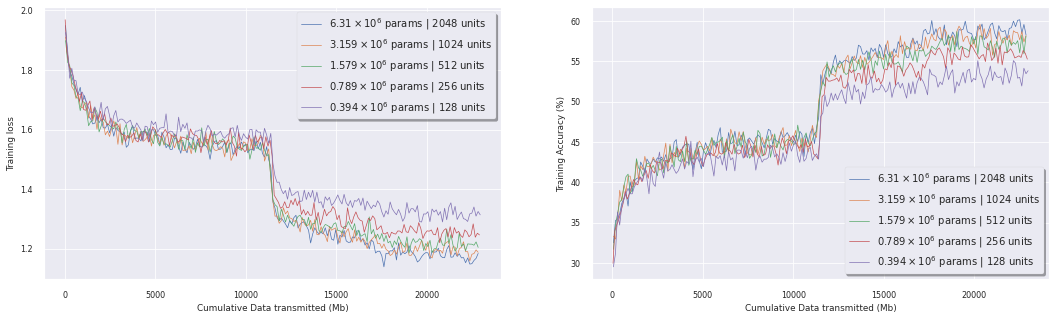

In [151]:
%matplotlib inline
'0.394 | 128','0.789 | 256','1.579 | 512','3.159 | 1024','6.31 | 2048'
fig, ax = plt.subplots(1, 2,figsize=(18,5))
ax[0].plot(data_dict['sp_0p95_2048_top'][:200],loss_dict['sp_0p95_2048_top'][:200],label = r'$6.31 \times 10^{6}$ params | 2048 units',linewidth = 0.7)
ax[0].plot(data_dict['sp_0p90_1024_top'][:200],loss_dict['sp_0p90_1024_top'][:200],label = r'$3.159 \times 10^{6}$ params | 1024 units',linewidth = 0.7)
ax[0].plot(data_dict['sp_0p80_512_top'][:200],loss_dict['sp_0p80_512_top'][:200],label = r'$1.579 \times 10^{6}$ params | 512 units',linewidth = 0.7)
ax[0].plot(data_dict['sp_0p60_256_top'][:200],loss_dict['sp_0p60_256_top'][:200],label = r'$0.789 \times 10^{6}$ params | 256 units',linewidth = 0.7)
ax[0].plot(data_dict['sp_0p20_128_top'][:200],loss_dict['sp_0p20_128_top'][:200],label = r'$0.394 \times 10^{6}$ params | 128 units',linewidth = 0.7)
ax[0].set_xlabel('Cumulative Data transmitted (Mb)')
ax[0].set_ylabel('Training loss')
ax[0].legend(prop={'size': 10},fancybox=True, shadow=True)

ax[1].plot(data_dict['sp_0p95_2048_top'][:200],acc_dict['sp_0p95_2048_top'][:200],label = r'$6.31 \times 10^{6}$ params | 2048 units',linewidth = 0.7)
ax[1].plot(data_dict['sp_0p90_1024_top'][:200],acc_dict['sp_0p90_1024_top'][:200],label = r'$3.159 \times 10^{6}$ params | 1024 units',linewidth = 0.7)
ax[1].plot(data_dict['sp_0p80_512_top'][:200],acc_dict['sp_0p80_512_top'][:200],label = r'$1.579 \times 10^{6}$ params | 512 units',linewidth = 0.7)
ax[1].plot(data_dict['sp_0p60_256_top'][:200],acc_dict['sp_0p60_256_top'][:200],label = r'$0.789 \times 10^{6}$ params | 256 units',linewidth = 0.7)
ax[1].plot(data_dict['sp_0p20_128_top'][:200],acc_dict['sp_0p20_128_top'][:200],label = r'$0.394 \times 10^{6}$ params | 128 units',linewidth = 0.7)
ax[1].set_xlabel('Cumulative Data transmitted (Mb)')
ax[1].set_ylabel('Training Accuracy (%)')
ax[1].legend(loc=4,prop={'size': 10},fancybox=True, shadow=True)
plt.savefig('fig2_data_topk.pdf')

## Random-K sparsification plots 

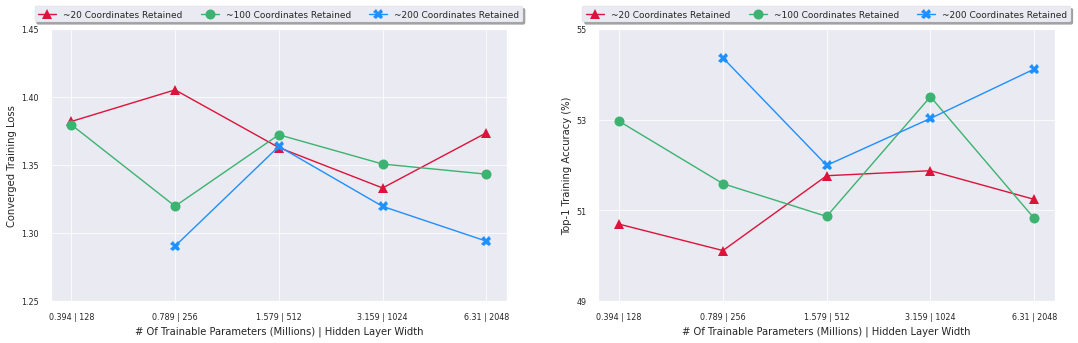

In [47]:
loss_dict['sp_0p99_2048'] = [x for x in loss_dict['sp_0p99_2048'] if not np.isnan(x)]
loss_dict['sp_0p98_1024'] = [x for x in loss_dict['sp_0p98_1024'] if not np.isnan(x)]
loss_dict['sp_0p96_512'] = [x for x in loss_dict['sp_0p96_512'] if not np.isnan(x)]
loss_dict['sp_0p92_256'] = [x for x in loss_dict['sp_0p92_256'] if not np.isnan(x)]
loss_dict['sp_0p84_128'] = [x for x in loss_dict['sp_0p84_128'] if not np.isnan(x)]

loss_dict['sp_0p95_2048'] = [x for x in loss_dict['sp_0p95_2048'] if not np.isnan(x)]
loss_dict['sp_0p90_1024'] = [x for x in loss_dict['sp_0p90_1024'] if not np.isnan(x)]
loss_dict['sp_0p80_512'] = [x for x in loss_dict['sp_0p80_512'] if not np.isnan(x)]
loss_dict['sp_0p60_256'] = [x for x in loss_dict['sp_0p60_256'] if not np.isnan(x)]
loss_dict['sp_0p20_128'] = [x for x in loss_dict['sp_0p20_128'] if not np.isnan(x)]

loss_dict['sp_0p90_2048'] = [x for x in loss_dict['sp_0p90_2048'] if not np.isnan(x)]
loss_dict['sp_0p80_1024'] = [x for x in loss_dict['sp_0p80_1024'] if not np.isnan(x)]
loss_dict['sp_0p60_512'] = [x for x in loss_dict['sp_0p60_512'] if not np.isnan(x)]
loss_dict['sp_0p20_256'] = [x for x in loss_dict['sp_0p20_256'] if not np.isnan(x)]

loss_dict['sp_0p93_2048'] = [x for x in loss_dict['sp_0p93_2048'] if not np.isnan(x)]
loss_dict['sp_0p87_1024'] = [x for x in loss_dict['sp_0p87_1024'] if not np.isnan(x)]
loss_dict['sp_0p75_512'] = [x for x in loss_dict['sp_0p75_512'] if not np.isnan(x)]
loss_dict['sp_0p5_256'] = [x for x in loss_dict['sp_0p5_256'] if not np.isnan(x)]
loss_dict['sp_0p0_128'] = [x for x in loss_dict['sp_0p0_128'] if not np.isnan(x)]



acc_dict['sp_0p99_2048'] = [x for x in acc_dict['sp_0p99_2048'] if not np.isnan(x)]
acc_dict['sp_0p98_1024'] = [x for x in acc_dict['sp_0p98_1024'] if not np.isnan(x)]
acc_dict['sp_0p96_512'] = [x for x in acc_dict['sp_0p96_512'] if not np.isnan(x)]
acc_dict['sp_0p92_256'] = [x for x in acc_dict['sp_0p92_256'] if not np.isnan(x)]
acc_dict['sp_0p84_128'] = [x for x in acc_dict['sp_0p84_128'] if not np.isnan(x)]

acc_dict['sp_0p95_2048'] = [x for x in acc_dict['sp_0p95_2048'] if not np.isnan(x)]
acc_dict['sp_0p90_1024'] = [x for x in acc_dict['sp_0p90_1024'] if not np.isnan(x)]
acc_dict['sp_0p80_512'] = [x for x in acc_dict['sp_0p80_512'] if not np.isnan(x)]
acc_dict['sp_0p60_256'] = [x for x in acc_dict['sp_0p60_256'] if not np.isnan(x)]
acc_dict['sp_0p20_128'] = [x for x in acc_dict['sp_0p20_128'] if not np.isnan(x)]

acc_dict['sp_0p90_2048'] = [x for x in acc_dict['sp_0p90_2048'] if not np.isnan(x)]
acc_dict['sp_0p80_1024'] = [x for x in acc_dict['sp_0p80_1024'] if not np.isnan(x)]
acc_dict['sp_0p60_512'] = [x for x in acc_dict['sp_0p60_512'] if not np.isnan(x)]
acc_dict['sp_0p20_256'] = [x for x in acc_dict['sp_0p20_256'] if not np.isnan(x)]

# acc_dict['sp_0p93_2048'] = [x for x in acc_dict['sp_0p93_2048'] if not np.isnan(x)]
# acc_dict['sp_0p87_1024'] = [x for x in acc_dict['sp_0p87_1024'] if not np.isnan(x)]
# acc_dict['sp_0p75_512'] = [x for x in acc_dict['sp_0p75_512'] if not np.isnan(x)]
# acc_dict['sp_0p5_256'] = [x for x in acc_dict['sp_0p5_256'] if not np.isnan(x)]
# acc_dict['sp_0p0_128'] = [x for x in acc_dict['sp_0p0_128'] if not np.isnan(x)]

testing = False

x = ['0.394 | 128','0.789 | 256','1.579 | 512','3.159 | 1024','6.31 | 2048']
x2 = ['0.789 | 256','1.579 | 512','3.159 | 1024','6.31 | 2048']

min_loss_99 = [min(loss_dict['sp_0p99_2048']), min(loss_dict['sp_0p98_1024'][:len(loss_dict['sp_0p99_2048'])]), min(loss_dict['sp_0p96_512'][:len(loss_dict['sp_0p99_2048'])]),
           min(loss_dict['sp_0p92_256'][:len(loss_dict['sp_0p99_2048'])]), min(loss_dict['sp_0p84_128'][:len(loss_dict['sp_0p99_2048'])])][::-1]

final_loss_99 = [loss_dict['sp_0p99_2048'][-1], loss_dict['sp_0p98_1024'][:len(loss_dict['sp_0p95_2048'])][-1], loss_dict['sp_0p96_512'][:len(loss_dict['sp_0p95_2048'])][-1],
           loss_dict['sp_0p92_256'][:len(loss_dict['sp_0p95_2048'])][-1], loss_dict['sp_0p84_128'][:len(loss_dict['sp_0p95_2048'])][-1]][::-1]

min_loss_95 = [min(loss_dict['sp_0p95_2048']), min(loss_dict['sp_0p90_1024'][:len(loss_dict['sp_0p95_2048'])]), min(loss_dict['sp_0p80_512'][:len(loss_dict['sp_0p95_2048'])]),
           min(loss_dict['sp_0p60_256'][:len(loss_dict['sp_0p99_2048'])]), min(loss_dict['sp_0p20_128'][:len(loss_dict['sp_0p99_2048'])])][::-1]

final_loss_95 = [loss_dict['sp_0p95_2048'][-1], loss_dict['sp_0p90_1024'][:len(loss_dict['sp_0p95_2048'])][-1], loss_dict['sp_0p80_512'][:len(loss_dict['sp_0p95_2048'])][-1],
           loss_dict['sp_0p60_256'][:len(loss_dict['sp_0p95_2048'])][-1], loss_dict['sp_0p20_128'][:len(loss_dict['sp_0p95_2048'])][-1]][::-1]

min_loss_90 = [min(loss_dict['sp_0p90_2048']), min(loss_dict['sp_0p80_1024'][:len(loss_dict['sp_0p90_2048'])]), min(loss_dict['sp_0p60_512'][:len(loss_dict['sp_0p90_2048'])]),
           min(loss_dict['sp_0p20_256'][:len(loss_dict['sp_0p20_256'])])][::-1]

final_loss_90 = [loss_dict['sp_0p90_2048'][-1], loss_dict['sp_0p80_1024'][:len(loss_dict['sp_0p90_2048'])][-1], loss_dict['sp_0p60_512'][:len(loss_dict['sp_0p90_2048'])][-1],
           loss_dict['sp_0p20_256'][:len(loss_dict['sp_0p20_256'])][-1]][::-1]



max_acc_99 = [max(acc_dict['sp_0p99_2048']), max(acc_dict['sp_0p98_1024'][:len(acc_dict['sp_0p99_2048'])]), max(acc_dict['sp_0p96_512'][:len(acc_dict['sp_0p99_2048'])]),
           max(acc_dict['sp_0p92_256'][:len(acc_dict['sp_0p99_2048'])]), max(acc_dict['sp_0p84_128'][:len(acc_dict['sp_0p99_2048'])])][::-1]

final_acc_99 = [acc_dict['sp_0p99_2048'][-1], acc_dict['sp_0p98_1024'][:len(acc_dict['sp_0p95_2048'])][-1], acc_dict['sp_0p96_512'][:len(acc_dict['sp_0p95_2048'])][-1],
           acc_dict['sp_0p92_256'][:len(acc_dict['sp_0p95_2048'])][-1], acc_dict['sp_0p84_128'][:len(acc_dict['sp_0p95_2048'])][-1]][::-1]

max_acc_95 = [max(acc_dict['sp_0p95_2048']), max(acc_dict['sp_0p90_1024'][:len(acc_dict['sp_0p95_2048'])]), max(acc_dict['sp_0p80_512'][:len(acc_dict['sp_0p95_2048'])]),
           max(acc_dict['sp_0p60_256'][:len(acc_dict['sp_0p99_2048'])]), max(acc_dict['sp_0p20_128'][:len(acc_dict['sp_0p99_2048'])])][::-1]

final_acc_95 = [acc_dict['sp_0p95_2048'][-1], acc_dict['sp_0p90_1024'][:len(acc_dict['sp_0p95_2048'])][-1], acc_dict['sp_0p80_512'][:len(acc_dict['sp_0p95_2048'])][-1],
           acc_dict['sp_0p60_256'][:len(acc_dict['sp_0p95_2048'])][-1], acc_dict['sp_0p20_128'][:len(acc_dict['sp_0p95_2048'])][-1]]

max_acc_90 = [max(acc_dict['sp_0p90_2048']), max(acc_dict['sp_0p80_1024'][:len(acc_dict['sp_0p90_2048'])]), max(acc_dict['sp_0p60_512'][:len(acc_dict['sp_0p90_2048'])]),
           max(acc_dict['sp_0p20_256'][:len(acc_dict['sp_0p20_256'])])][::-1]

final_acc_90 = [acc_dict['sp_0p90_2048'][-1], acc_dict['sp_0p80_1024'][:len(acc_dict['sp_0p90_2048'])][-1], acc_dict['sp_0p60_512'][:len(acc_dict['sp_0p90_2048'])][-1],
           acc_dict['sp_0p20_256'][:len(acc_dict['sp_0p20_256'])][-1]][::-1]

test_accs_99 = [53.95346702912707, 53.495865396556, 53.56013816770699, 52.775779120673015, 53.1488151696382][::-1]
test_accs_95 = [56.33041409212069, 55.10952250498947, 54.57406851027288, 55.33491941274385, 53.54595400765024][::-1]
test_accs_90 = [56.776941371247986, 55.9030992497581, 55.01205003431453, 54.752][::-1]

test_loss_99 = [1.3114164750787276, 1.305461213558535, 1.2997563322888146, 1.3102682255491425, 1.3169881361949294][::-1]
test_loss_95 = [1.2650436359115793, 1.2819068296046197, 1.2970489082457144, 1.2925886127013195, 1.325993473016763][::-1]
test_loss_90 = [1.2642480104784422, 1.2749229926097243, 1.2900930612902097,1.2758674563217163][::-1]

test_accs_99_1 = [41.80256967023296, 42.22201823956782, 41.10273885529488, 42.36280116926876, 42.52392083247301][::-1]
test_accs_95_1 = [45.22612195627339, 40.782205101844376, 45.56241287003787, 39.86280641291747, 39.938703061885604][::-1]
test_accs_90_1 = [44.160437724783165, 45.229407653621294, 44.73651182452249, 44.7365 ][::-1]

test_loss_99_1 = [1.6940020454869373, 1.6654367600418627, 1.677096917741932, 1.6876212414959446, 1.694428761396542][::-1]
test_loss_95_1 = [1.6411742845344124, 1.658621511354926, 1.6707212051813258, 1.6670908104380942, 1.69627484234469][::-1]
test_loss_90_1 = [1.6495943634883734, 1.655196126156312, 1.6643775543454686, 1.67437755434 ][::-1]

fig, ax = plt.subplots(1, 2,figsize=(18,5))
ax[0].plot(x, final_loss_99,color='crimson' ,markevery=True, marker = '^',markersize=10, label = '~20 Coordinates Retained')



ax[0].plot(x,final_loss_95,color='mediumseagreen',markevery=True, marker = 'o',markersize=10, label='~100 Coordinates Retained' )


ax[0].plot(x2,final_loss_90,color='dodgerblue',markevery=True, marker = 'X',markersize=10, label='~200 Coordinates Retained' )


ax[0].legend(loc='upper center', prop={'size': 9}, bbox_to_anchor=(0.5, 1.1),
          ncol=3, fancybox=True, shadow=True)
ax[0].set_ylabel('Converged Training Loss',fontsize=10)
ax[0].set_xlabel('# Of Trainable Parameters (Millions) | Hidden Layer Width',fontsize=10)
ax[0].yaxis.set_ticks([1.25,1.30,1.35,1.40,1.45])

ax[1].plot(x, final_acc_99,color='crimson', markevery=True, marker = '^',markersize=10, label = '~20 Coordinates Retained')



ax[1].plot(x,final_acc_95,color='mediumseagreen',markevery=True, marker = 'o',markersize=10,label='~100 Coordinates Retained' )


ax[1].plot(x2,final_acc_90,color='dodgerblue',markevery=True, marker = 'X',markersize=10,label='~200 Coordinates Retained' )


ax[1].legend(loc='upper center',prop={'size': 9}, bbox_to_anchor=(0.5, 1.1),
          ncol=3, fancybox=True, shadow=True)
ax[1].set_ylabel('Top-1 Training Accuracy (%)',fontsize=10)
ax[1].set_xlabel('# Of Trainable Parameters (Millions) | Hidden Layer Width',fontsize=10)
ax[1].yaxis.set_ticks([49,51,53,55])


if(testing is True):
    ax[0].plot(x, test_loss_99_1,'--',color='crimson', markevery=True, marker = '^',markersize=5,label = '~20 Coordinates Retained')
    ax[0].plot(x, test_loss_95_1,'--',color='mediumseagreen', markevery=True, marker = 'o',markersize=5,label = '~100 Coordinates Retained')
    ax[0].plot(x2, test_loss_90_1,'--',color='dodgerblue', markevery=True, marker = 'X',markersize=5,label = '~200 Coordinates Retained')
    ax[1].plot(x, test_accs_99_1,'--',color='crimson', markevery=True, marker = '^',markersize=5,label = '~20 Coordinates Retained')
    ax[1].plot(x, test_accs_95_1,'--',color='mediumseagreen', markevery=True, marker = 'o',markersize=5,label = '~100 Coordinates Retained')
    ax[1].plot(x2, test_accs_90_1,'--',color='dodgerblue', markevery=True, marker = 'X',markersize=5,label = '~200 Coordinates Retained')
plt.savefig('randomk-fig1.pdf')

### Test data on CIFAR-10.1 , Random-K

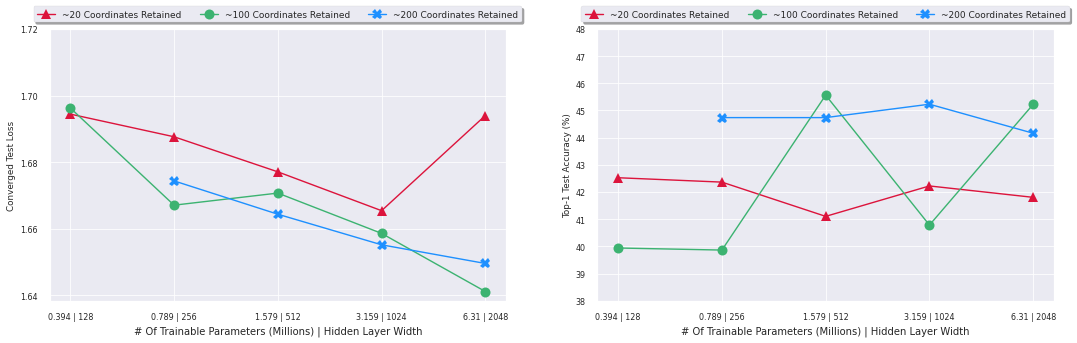

In [48]:
test_accs_99 = [53.95346702912707, 53.495865396556, 53.56013816770699, 52.775779120673015, 53.1488151696382][::-1]
test_accs_95 = [56.33041409212069, 55.10952250498947, 54.57406851027288, 55.33491941274385, 53.54595400765024][::-1]
test_accs_90 = [56.776941371247986, 55.9030992497581, 55.01205003431453, 54.752][::-1]

test_loss_99 = [1.3114164750787276, 1.305461213558535, 1.2997563322888146, 1.3102682255491425, 1.3169881361949294][::-1]
test_loss_95 = [1.2650436359115793, 1.2819068296046197, 1.2970489082457144, 1.2925886127013195, 1.325993473016763][::-1]
test_loss_90 = [1.2642480104784422, 1.2749229926097243, 1.2900930612902097,1.2758674563217163][::-1]

test_accs_99_1 = [41.80256967023296, 42.22201823956782, 41.10273885529488, 42.36280116926876, 42.52392083247301][::-1]
test_accs_95_1 = [45.22612195627339, 40.782205101844376, 45.56241287003787, 39.86280641291747, 39.938703061885604][::-1]
test_accs_90_1 = [44.160437724783165, 45.229407653621294, 44.73651182452249, 44.7365 ][::-1]

test_loss_99_1 = [1.6940020454869373, 1.6654367600418627, 1.677096917741932, 1.6876212414959446, 1.694428761396542][::-1]
test_loss_95_1 = [1.6411742845344124, 1.658621511354926, 1.6707212051813258, 1.6670908104380942, 1.69627484234469][::-1]
test_loss_90_1 = [1.6495943634883734, 1.655196126156312, 1.6643775543454686, 1.67437755434 ][::-1]


fig, ax = plt.subplots(1, 2,figsize=(18,5))
ax[0].plot(x, test_loss_99_1,'-',color='crimson', markevery=True, marker = '^',markersize=10,label = '~20 Coordinates Retained')
ax[0].plot(x, test_loss_95_1,'-',color='mediumseagreen', markevery=True, marker = 'o',markersize=10,label = '~100 Coordinates Retained')
ax[0].plot(x2, test_loss_90_1,'-',color='dodgerblue', markevery=True, marker = 'X',markersize=10,label = '~200 Coordinates Retained')
ax[1].plot(x, test_accs_99_1,'-',color='crimson', markevery=True, marker = '^',markersize=10,label = '~20 Coordinates Retained')
ax[1].plot(x, test_accs_95_1,'-',color='mediumseagreen', markevery=True, marker = 'o',markersize=10,label = '~100 Coordinates Retained')
ax[1].plot(x2, test_accs_90_1,'-',color='dodgerblue', markevery=True, marker = 'X',markersize=10,label = '~200 Coordinates Retained')
ax[1].legend(loc='upper center',prop={'size': 9}, bbox_to_anchor=(0.5, 1.1),
          ncol=3, fancybox=True, shadow=True)

ax[0].legend(loc='upper center', prop={'size': 9}, bbox_to_anchor=(0.5, 1.1),
          ncol=3, fancybox=True, shadow=True)

ax[1].set_ylabel('Top-1 Test Accuracy (%)')
ax[1].set_xlabel('# Of Trainable Parameters (Millions) | Hidden Layer Width',fontsize=10)
ax[1].yaxis.set_ticks([38,39,40,41,42,43,44,45,46,47,48])
ax[0].set_ylabel('Converged Test Loss')
ax[0].set_xlabel('# Of Trainable Parameters (Millions) | Hidden Layer Width',fontsize=10)
ax[0].yaxis.set_ticks([1.64,1.66,1.68,1.70,1.72])

plt.savefig('randomk-fig1_test.pdf')

## Plots on Top-K sparsification

In [72]:
#re-initialize the paths
'''
Top-K 
'''
#99% sparsification
sp_0p99_2048_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621665989_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.99__dataset-cifar10_unit-2048/0'
sp_0p98_1024_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621672959_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.98__dataset-cifar10_unit-1024/0'
sp_0p96_512_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621678553_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.96__dataset-cifar10_unit-512/0'
sp_0p92_256_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621682047_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.92__dataset-cifar10_unit-256/0'
sp_0p84_128_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621684227_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.84__dataset-cifar10_unit-128/0'


#95% sparsification
sp_0p95_2048_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621685931_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.95__dataset-cifar10_unit-2048/0'
sp_0p90_1024_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621693377_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9__dataset-cifar10_unit-1024/0'
sp_0p80_512_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621699886_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-512/0'
sp_0p60_256_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621703643_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.6__dataset-cifar10_unit-256/0'
sp_0p20_128_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621706432_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.2__dataset-cifar10_unit-128/0'

#90% sparsification
sp_0p90_2048_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621708530_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9__dataset-cifar10_unit-2048/0'
sp_0p80_1024_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621716284_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.8__dataset-cifar10_unit-1024/0'
sp_0p60_512_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621722482_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.6__dataset-cifar10_unit-512/0'
sp_0p20_256_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/top_k/1621726195_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.2__dataset-cifar10_unit-256/0'

#93.75% sparsification
sp_0p93_2048_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621757828_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.9375__dataset-cifar10_unit-2048/0'
sp_0p87_1024_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621765281_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.875__dataset-cifar10_unit-1024/0'
sp_0p75_512_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621772113_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.75__dataset-cifar10_unit-512/0'
sp_0p5_256_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621776031_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.5__dataset-cifar10_unit-256/0'
sp_0p0_128_top = '/home/aarao8/choco_2/ChocoSGD/dl_code/data/checkpoint/cifar10/mlp/test/equal_data_0p99_0p95/1621779092_lr-0.1_epochs-300_batchsize-128_num_mpi_process_8_topology-ring_comm_info-compress_top_k-0.0__dataset-cifar10_unit-128/0'

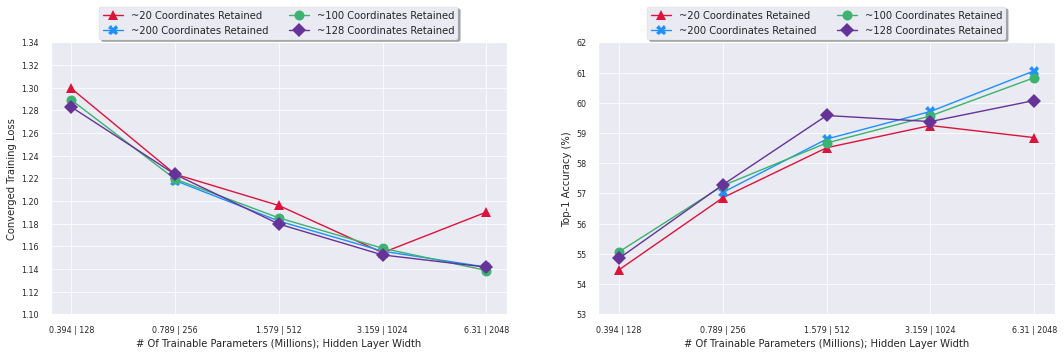

In [168]:
loss_dict['sp_0p99_2048_top'] = [x for x in loss_dict['sp_0p99_2048_top'] if not np.isnan(x)]
loss_dict['sp_0p98_1024_top'] = [x for x in loss_dict['sp_0p98_1024_top'] if not np.isnan(x)]
loss_dict['sp_0p96_512_top'] = [x for x in loss_dict['sp_0p96_512_top'] if not np.isnan(x)]
loss_dict['sp_0p92_256_top'] = [x for x in loss_dict['sp_0p92_256_top'] if not np.isnan(x)]
loss_dict['sp_0p84_128_top'] = [x for x in loss_dict['sp_0p84_128_top'] if not np.isnan(x)]

loss_dict['sp_0p95_2048_top'] = [x for x in loss_dict['sp_0p95_2048_top'] if not np.isnan(x)]
loss_dict['sp_0p90_1024_top'] = [x for x in loss_dict['sp_0p90_1024_top'] if not np.isnan(x)]
loss_dict['sp_0p80_512_top'] = [x for x in loss_dict['sp_0p80_512_top'] if not np.isnan(x)]
loss_dict['sp_0p60_256_top'] = [x for x in loss_dict['sp_0p60_256_top'] if not np.isnan(x)]
loss_dict['sp_0p20_128_top'] = [x for x in loss_dict['sp_0p20_128_top'] if not np.isnan(x)]

loss_dict['sp_0p90_2048_top'] = [x for x in loss_dict['sp_0p90_2048_top'] if not np.isnan(x)]
loss_dict['sp_0p80_1024_top'] = [x for x in loss_dict['sp_0p80_1024_top'] if not np.isnan(x)]
loss_dict['sp_0p60_512_top'] = [x for x in loss_dict['sp_0p60_512_top'] if not np.isnan(x)]
loss_dict['sp_0p20_256_top'] = [x for x in loss_dict['sp_0p20_256_top'] if not np.isnan(x)]

loss_dict['sp_0p93_2048_top'] = [x for x in loss_dict['sp_0p93_2048_top'] if not np.isnan(x)]
loss_dict['sp_0p87_1024_top'] = [x for x in loss_dict['sp_0p87_1024_top'] if not np.isnan(x)]
loss_dict['sp_0p75_512_top'] = [x for x in loss_dict['sp_0p75_512_top'] if not np.isnan(x)]
loss_dict['sp_0p5_256_top'] = [x for x in loss_dict['sp_0p5_256_top'] if not np.isnan(x)]
loss_dict['sp_0p0_128_top'] = [x for x in loss_dict['sp_0p0_128_top'] if not np.isnan(x)]

###

acc_dict['sp_0p99_2048_top'] = [x for x in acc_dict['sp_0p99_2048_top'] if not np.isnan(x)]
acc_dict['sp_0p98_1024_top'] = [x for x in acc_dict['sp_0p98_1024_top'] if not np.isnan(x)]
acc_dict['sp_0p96_512_top'] = [x for x in acc_dict['sp_0p96_512_top'] if not np.isnan(x)]
acc_dict['sp_0p92_256_top'] = [x for x in acc_dict['sp_0p92_256_top'] if not np.isnan(x)]
acc_dict['sp_0p84_128_top'] = [x for x in acc_dict['sp_0p84_128_top'] if not np.isnan(x)]

acc_dict['sp_0p95_2048_top'] = [x for x in acc_dict['sp_0p95_2048_top'] if not np.isnan(x)]
acc_dict['sp_0p90_1024_top'] = [x for x in acc_dict['sp_0p90_1024_top'] if not np.isnan(x)]
acc_dict['sp_0p80_512_top'] = [x for x in acc_dict['sp_0p80_512_top'] if not np.isnan(x)]
acc_dict['sp_0p60_256_top'] = [x for x in acc_dict['sp_0p60_256_top'] if not np.isnan(x)]
acc_dict['sp_0p20_128_top'] = [x for x in acc_dict['sp_0p20_128_top'] if not np.isnan(x)]

acc_dict['sp_0p90_2048_top'] = [x for x in acc_dict['sp_0p90_2048_top'] if not np.isnan(x)]
acc_dict['sp_0p80_1024_top'] = [x for x in acc_dict['sp_0p80_1024_top'] if not np.isnan(x)]
acc_dict['sp_0p60_512_top'] = [x for x in acc_dict['sp_0p60_512_top'] if not np.isnan(x)]
acc_dict['sp_0p20_256_top'] = [x for x in acc_dict['sp_0p20_256_top'] if not np.isnan(x)]

acc_dict['sp_0p93_2048_top'] = [x for x in acc_dict['sp_0p93_2048_top'] if not np.isnan(x)]
acc_dict['sp_0p87_1024_top'] = [x for x in acc_dict['sp_0p87_1024_top'] if not np.isnan(x)]
acc_dict['sp_0p75_512_top'] = [x for x in acc_dict['sp_0p75_512_top'] if not np.isnan(x)]
acc_dict['sp_0p5_256_top'] = [x for x in acc_dict['sp_0p5_256_top'] if not np.isnan(x)]
acc_dict['sp_0p0_128_top'] = [x for x in acc_dict['sp_0p0_128_top'] if not np.isnan(x)]


testing = False

x = ['0.394 | 128','0.789 | 256','1.579 | 512','3.159 | 1024','6.31 | 2048']
x2 = ['0.789 | 256','1.579 | 512','3.159 | 1024','6.31 | 2048']

stopat = len(loss_dict['sp_0p93_2048_top'])


min_loss_99 = [min(loss_dict['sp_0p99_2048_top']), min(loss_dict['sp_0p98_1024_top'][:stopat]), min(loss_dict['sp_0p96_512_top'][:stopat]),
           min(loss_dict['sp_0p92_256_top'][:stopat]), min(loss_dict['sp_0p84_128_top'][:stopat])][::-1]

final_loss_99 = [loss_dict['sp_0p99_2048_top'][-1], loss_dict['sp_0p98_1024_top'][:stopat][-1], loss_dict['sp_0p96_512_top'][:stopat][-1],
           loss_dict['sp_0p92_256_top'][:stopat][-1], loss_dict['sp_0p84_128_top'][:stopat][-1]][::-1]

min_loss_95 = [min(loss_dict['sp_0p95_2048_top']), min(loss_dict['sp_0p90_1024_top'][:stopat]), min(loss_dict['sp_0p80_512_top'][:stopat]),
           min(loss_dict['sp_0p60_256_top'][:stopat]), min(loss_dict['sp_0p20_128_top'][:stopat])][::-1]

final_loss_95 = [loss_dict['sp_0p95_2048_top'][-1], loss_dict['sp_0p90_1024_top'][:len(loss_dict['sp_0p95_2048_top'])][-1], loss_dict['sp_0p80_512_top'][:len(loss_dict['sp_0p95_2048_top'])][-1],
           loss_dict['sp_0p60_256_top'][:stopat][-1], loss_dict['sp_0p20_128_top'][:stopat][-1]][::-1]

min_loss_90 = [min(loss_dict['sp_0p90_2048_top']), min(loss_dict['sp_0p80_1024_top'][:stopat]), min(loss_dict['sp_0p60_512_top'][:stopat]),
           min(loss_dict['sp_0p20_256_top'][:len(loss_dict['sp_0p20_256_top'])])][::-1]

final_loss_90 = [loss_dict['sp_0p90_2048_top'][-1], loss_dict['sp_0p80_1024_top'][:stopat][-1], loss_dict['sp_0p60_512_top'][:stopat][-1],
           loss_dict['sp_0p20_256_top'][:stopat][-1]][::-1]



min_loss_93 = [min(loss_dict['sp_0p93_2048_top']), min(loss_dict['sp_0p87_1024_top'][:stopat]), min(loss_dict['sp_0p75_512_top'][:stopat]),
           min(loss_dict['sp_0p5_256_top'][:stopat]), min(loss_dict['sp_0p0_128_top'][:stopat])][::-1]

final_loss_93 = [loss_dict['sp_0p93_2048_top'][-1], loss_dict['sp_0p87_1024_top'][:stopat][-1], loss_dict['sp_0p75_512_top'][:stopat][-1],
           loss_dict['sp_0p5_256_top'][:stopat][-1], loss_dict['sp_0p0_128_top'][:stopat][-1]][::-1]
###
######
##########################

#### 99
max_acc_99 = [max(acc_dict['sp_0p99_2048_top']), max(acc_dict['sp_0p98_1024_top'][:stopat]), max(acc_dict['sp_0p96_512_top'][:stopat]),
           max(acc_dict['sp_0p92_256_top'][:stopat]), max(acc_dict['sp_0p84_128_top'][:stopat])][::-1]

final_acc_99 = [acc_dict['sp_0p99_2048_top'][-1], acc_dict['sp_0p98_1024_top'][:len(acc_dict['sp_0p95_2048_top'])][-1], acc_dict['sp_0p96_512_top'][:len(acc_dict['sp_0p95_2048_top'])][-1],
           acc_dict['sp_0p92_256_top'][:stopat][-1], acc_dict['sp_0p84_128_top'][:stopat][-1]][::-1]

#### 95
max_acc_95 = [max(acc_dict['sp_0p95_2048_top']), max(acc_dict['sp_0p90_1024_top'][:stopat]), max(acc_dict['sp_0p80_512_top'][:stopat]),
           max(acc_dict['sp_0p60_256_top'][:stopat]), max(acc_dict['sp_0p20_128_top'][:stopat])][::-1]

final_acc_95 = [acc_dict['sp_0p95_2048'][-1], acc_dict['sp_0p90_1024_top'][:len(acc_dict['sp_0p95_2048_top'])][-1], acc_dict['sp_0p80_512_top'][:len(acc_dict['sp_0p95_2048_top'])][-1],
           acc_dict['sp_0p60_256_top'][:stopat][-1], acc_dict['sp_0p20_128_top'][:stopat][-1]]

#### 90.0
max_acc_90 = [max(acc_dict['sp_0p90_2048_top']), max(acc_dict['sp_0p80_1024_top'][:stopat]), max(acc_dict['sp_0p60_512_top'][:stopat]),
           max(acc_dict['sp_0p20_256_top'][:stopat])][::-1]

final_acc_90 = [acc_dict['sp_0p90_2048_top'][-1], acc_dict['sp_0p80_1024_top'][:stopat][-1], acc_dict['sp_0p60_512_top'][:stopat][-1],
           acc_dict['sp_0p20_256_top'][:stopat][-1]][::-1]

#### 93.75
max_acc_93 = [max(acc_dict['sp_0p93_2048_top']), max(acc_dict['sp_0p87_1024_top'][:stopat]), max(acc_dict['sp_0p75_512_top'][:stopat]),
           max(acc_dict['sp_0p5_256_top'][:stopat]), max(acc_dict['sp_0p0_128_top'][:stopat])][::-1]

final_acc_93 = [acc_dict['sp_0p93_2048_top'][-1], acc_dict['sp_0p87_1024_top'][:stopat][-1], acc_dict['sp_0p75_512_top'][:stopat][-1],
           acc_dict['sp_0p5_256_top'][:stopat][-1], acc_dict['sp_0p0_128_top'][:stopat][-1]][::-1]


###plots for loss
fig, ax = plt.subplots(1, 2,figsize=(18,5))
ax[0].plot(x, min_loss_99,color='crimson' ,markevery=True, marker = '^',markersize=10, label = '~20 Coordinates Retained')
ax[0].plot(x2,min_loss_90,color='dodgerblue',markevery=True, marker = 'X',markersize=10, label='~200 Coordinates Retained' )
ax[0].plot(x,min_loss_95,color='mediumseagreen',markevery=True, marker = 'o',markersize=10, label='~100 Coordinates Retained' )
ax[0].plot(x,min_loss_93,color='rebeccapurple',markevery=True, marker = 'D',markersize=10, label='~128 Coordinates Retained' )



ax[0].legend(loc='upper center', prop={'size': 10}, bbox_to_anchor=(0.5, 1.15),
          ncol=2, fancybox=True, shadow=True)
ax[0].set_ylabel('Converged Training Loss',fontsize=10)
ax[0].set_xlabel('# Of Trainable Parameters (Millions); Hidden Layer Width',fontsize=10)
ax[0].yaxis.set_ticks([1.10,1.12,1.14,1.16,1.18,1.20,1.22,1.24,1.26,1.28,1.30,1.32,1.34])


#Plots for accuracy
ax[1].plot(x, max_acc_99,color='crimson', markevery=True, marker = '^',markersize=10, label = '~20 Coordinates Retained')


ax[1].plot(x2,max_acc_90,color='dodgerblue',markevery=True, marker = 'X',markersize=10,label='~200 Coordinates Retained' )
ax[1].plot(x,max_acc_95,color='mediumseagreen',markevery=True, marker = 'o',markersize=10,label='~100 Coordinates Retained' )
ax[1].plot(x,max_acc_93,color='rebeccapurple',markevery=True, marker = 'D',markersize=10,label='~128 Coordinates Retained' )

ax[1].legend(loc='upper center',prop={'size': 10}, bbox_to_anchor=(0.5, 1.15),
          ncol=2, fancybox=True, shadow=True)
ax[1].set_ylabel('Top-1 Accuracy (%)',fontsize=10)
ax[1].set_xlabel('# Of Trainable Parameters (Millions); Hidden Layer Width',fontsize=10)
ax[1].yaxis.set_ticks([53,54,55,56,57,58,59,60,61,62])
    
plt.savefig('topk-fig1_wo20.pdf')

In [165]:
len(acc_dict['sp_0p75_512_top'])

263

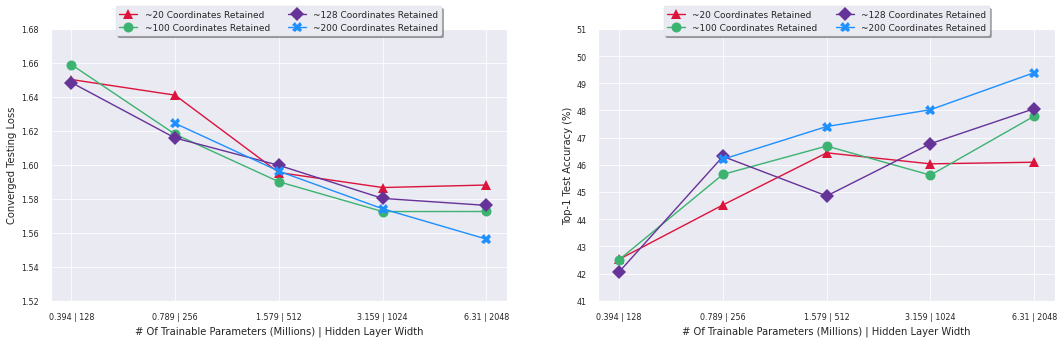

In [169]:
test_accs_99 = [58.91496271308808, 58.897927334557615, 59.331474295737245, 57.89083968258065, 55.11090746582725][::-1]
test_accs_95 = [60.025372698351006, 59.221760186754246, 59.70501647328797, 56.973770631122996, 54.96851343960552][::-1]
#test_accs_90 = [56.776941371247986, 55.9030992497581, 55.01205003431453, 54.752][::-1]

test_loss_99 = [1.1788526131718797, 1.1754256383353554, 1.1928737324189682, 1.2191830779963522, 1.266011229798838][::-1]
test_loss_95 = [1.1512074652996191, 1.163891785364158, 1.1792305441403728, 1.2153379711195973, 1.2601006358684304][::-1]
#test_loss_90 = [1.2642480104784422, 1.2749229926097243, 1.2900930612902097,1.2758674563217163][::-1]

test_accs_99_1 = [46.09545786562472, 46.03496082699779, 46.440258008900145, 44.52278776574663, 42.52356144143582][::-1]
test_accs_95_1 = [47.79079558211811, 45.61953229174482, 46.68979004883995, 45.64714342426753, 42.510769538097335][::-1]
test_accs_90_1 = [49.3901567037889, 48.02708721721523, 47.40832948481001, 46.204361352464964][::-1]

test_loss_99_1 = [1.5880913225229596, 1.5866229149232385, 1.5954528219400381, 1.6409959942830028, 1.6502107353294269][::-1]
test_loss_95_1 = [1.5725195757459152, 1.5724758712897893, 1.590021030207281, 1.6180090367437223, 1.658995136650512][::-1]
test_loss_90_1 = [1.5562625048785704, 1.5741101750233792, 1.5962625048785704, 1.6244037586040796 ][::-1]

test_accs_93_1 = [48.06419661242301, 46.77652696106452, 44.855035880034045, 46.30800005856318, 42.06197638904307][::-1]
test_loss_93_1 = [1.576108135626826, 1.5802193368973676, 1.599698625814286, 1.6158006279356778, 1.6484408678459004][::-1]

fig, ax = plt.subplots(1, 2,figsize=(18,5))
ax[0].plot(x, test_loss_99_1,'-',color='crimson', markevery=True, marker = '^',markersize=10,label = '~20 Coordinates Retained')
ax[0].plot(x, test_loss_95_1,'-',color='mediumseagreen', markevery=True, marker = 'o',markersize=10,label = '~100 Coordinates Retained')
ax[0].plot(x, test_loss_93_1,color='rebeccapurple',markevery=True, marker = 'D',markersize=10, label='~128 Coordinates Retained' )
ax[0].plot(x2, test_loss_90_1,'-',color='dodgerblue', markevery=True, marker = 'X',markersize=10,label = '~200 Coordinates Retained')

ax[1].plot(x, test_accs_99_1,'-',color='crimson', markevery=True, marker = '^',markersize=10,label = '~20 Coordinates Retained')
ax[1].plot(x, test_accs_95_1,'-',color='mediumseagreen', markevery=True, marker = 'o',markersize=10,label = '~100 Coordinates Retained')
ax[1].plot(x, test_accs_93_1,color='rebeccapurple',markevery=True, marker = 'D',markersize=10,label='~128 Coordinates Retained' )
ax[1].plot(x2, test_accs_90_1,'-',color='dodgerblue', markevery=True, marker = 'X',markersize=10,label = '~200 Coordinates Retained')

ax[1].legend(loc='upper center',prop={'size': 9}, bbox_to_anchor=(0.5, 1.1),
          ncol=2, fancybox=True, shadow=True)

ax[0].legend(loc='upper center', prop={'size': 9}, bbox_to_anchor=(0.5, 1.1),
          ncol=2, fancybox=True, shadow=True)

ax[1].set_ylabel('Top-1 Test Accuracy (%)',fontsize=10)
ax[1].set_xlabel('# Of Trainable Parameters (Millions) | Hidden Layer Width',fontsize=10)
ax[1].yaxis.set_ticks([41,42,43,44,45,46,47,48,49,50,51])
ax[0].set_ylabel('Converged Testing Loss',fontsize=10)
ax[0].set_xlabel('# Of Trainable Parameters (Millions) | Hidden Layer Width',fontsize=10)
ax[0].yaxis.set_ticks([1.52,1.54,1.56,1.58,1.60,1.62,1.64,1.66,1.68])

plt.savefig('topk-fig1_test_wo20.pdf')

In [132]:
len(loss_dict['n_8_256_0p99'])

298